# Online Trading Store Database Analysis

## Context

The Bhejane trading store is an online retailer specialising in Covid essential items.

**Objective:**

There is a denormalised database consisting of two tables. In this assignment you are to transform the database such that is in third normal form (3NF). Once the database is transformed, you are to perform analysis on the data in the database.

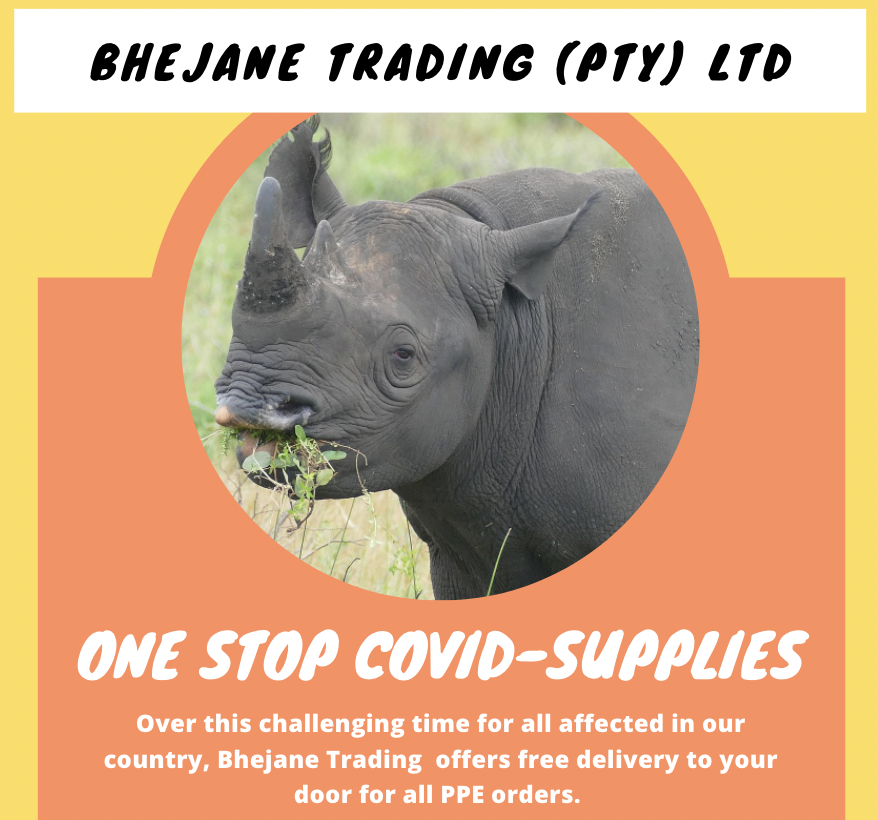

<div align="center" >
    Image by <a href="https://commons.wikimedia.org/wiki/File:Black_Rhino_(Diceros_bicornis)_browsing_..._(46584052962).jpg">Wikimedia Commons</a>
</div>

## Database Setup

### Loading the Database

In [1]:
# Importing the necassary libraries

import sqlite3
import csv
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
# Loading the magic command to prepare the SQL environment

%load_ext sql_magic

In [ ]:
# Loading the SQLite Database

engine  = create_engine("sqlite:///bhejane.db")
%config SQL.conn_name ='engine'

### Data description

The original database consist of 2 tables. 
* Product Table
* Transaction Table

The `Product` table consists of the stock of all inventory that Bhejane has on hand currently, or has had on hand historically. Items which are in this table are able to be purchased, and a record of all sales (transactions) in 2020 is notorised in the `Transactions` table. To link the tables - the `barcode` can be used. Any item in the `Transactions` table, must therefore appear in the `Products` table. 

In [2]:
# Reading the Datasets

data_description = pd.read_excel('Data Description.xlsx')
data_description

,Table Name,Column Name,Desciption
0,Products,Width,Width of the product once assembled
1,Products,Length,Length of the product once assembled
2,Products,Height,Height of the product once assembled
3,Products,Barcode,The unique product identifier
4,Products,Quantity,Number of goods in stock
5,Products,Brand,Product brand name relating to product company
6,Products,NavigationPath,Navigation path to specific product
7,Products,Colour,Name default colour for the product
8,Products,StockCountry,Country where the stock was bought from
9,Products,ProductDescription,Descriptive product name


### Setting up the database

In [3]:
# Connecting to the SQLite Database

conn = sqlite3.connect('bhejane.db')
cursor = conn.cursor()

In [4]:
# Creating the Products and Transaction tables

%%read_sql

DROP TABLE IF EXISTS "Products";
DROP TABLE IF EXISTS "Transactions";

CREATE TABLE "Products" (
    "Width"   REAL,
    "Length"  REAL,
    "Height"  REAL,
    "Barcode" VARCHAR(150),
    "Quantity" REAL,
    "Brand" VARCHAR(150), 
    "NavigationPath" VARCHAR(150),
    "Colour" VARCHAR(150),
    "StockCountry" VARCHAR(150),
    "ProductDescription" VARCHAR(150),
    "PackType" VARCHAR(150), 
    "Volume_litre" REAL, 
    "Warranty" VARCHAR(150), 
    "Weight_kg" REAL,
    "ItemDescription" VARCHAR(150), 
    "Price" REAL
);

CREATE TABLE "Transactions" (
    "CartID" INTEGER,
    "Barcode" VARCHAR(150), 
    "Total" REAL,
    "UserName" VARCHAR(150), 
    "InvoiceDate" DATETIME
);

Query started at 09:15:14 PM Egypt Standard Time; Query executed in 0.00 m

In [5]:
# Loading data into the Product table

with open('bhejane_covid_essentials_Products.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['Width'],i['Length'],i['Height'], i['Barcode'], i['Quantity'], i['Brand'], i['NavigationPath'], i['Colour'], i['StockCountry'], i['ProductDescription'],i['PackType'],i['Volume_litre'],i['Warranty'],i['Weight_kg'],i["ItemDescription"],i['Price']) for i in dr]

cursor.executemany("INSERT INTO Products VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
conn.commit()

# Loading data into the Transaction table

with open('bhejane_covid_essentials_Transactions.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['CartID'],i['Barcode'], i['Total'], i['UserName'], i['InvoiceDate']) for i in dr]

cursor.executemany("INSERT INTO Transactions VALUES (?, ?, ?, ?, ?);", to_db)
conn.commit()

### Denormalizing Database Tables

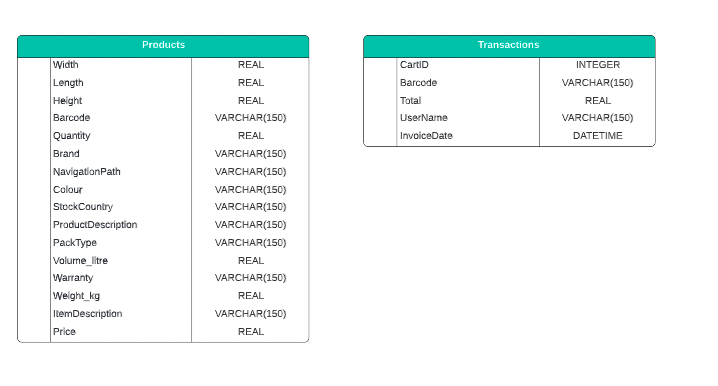

In [6]:
# Exploring the Denormalized tables

%%read_sql

SELECT * FROM Transactions
LIMIT 15;

Query started at 09:15:15 PM Egypt Standard Time; Query executed in 0.00 m

,CartID,Barcode,Total,UserName,InvoiceDate
0,102,300507946,1523.0,DIMPHO,2020-07-02 0:00:00
1,1,43859499182,149.0,Hendrik,2020-08-05 0:00:00
2,2,614143543746,99.0,Faristha,2020-07-29 0:00:00
3,179,617566827837,3464.0,Zanele,2020-04-04 0:00:00
4,136,619659097318,3301.0,Junaid,2020-08-04 0:00:00
5,3,619659141059,75.0,JOHAN,2020-05-20 0:00:00
6,111,619659141080,550.0,Michael,2020-04-18 0:00:00
7,112,619659161354,357.0,Nico,2020-05-09 0:00:00
8,4,638142992763,44.0,Sandra,2020-03-25 0:00:00
9,5,638142992763,44.0,Sheila,2020-08-03 0:00:00


### Normalize the database tables to their 1st Normal Form (1NF)

Below is an Entity Relationship Diagram (ERD) of the Bhejane Online Trading Store database that conforms to the 1st Normal Form:

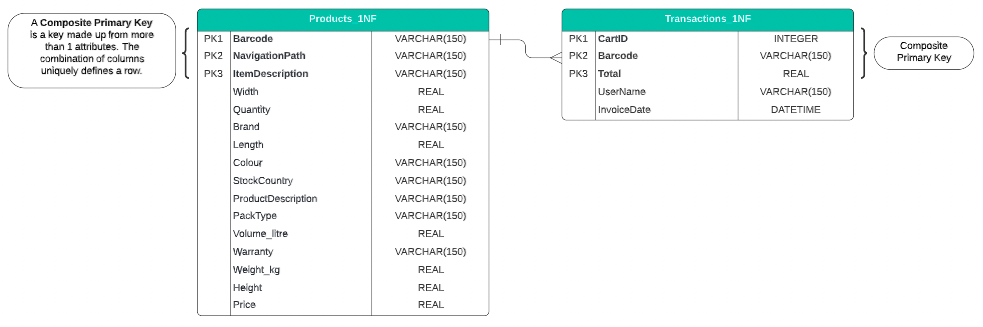

In [7]:
# Creating tables required for the 1NF

%%read_sql

DROP TABLE IF EXISTS "Products_1NF";
DROP TABLE IF EXISTS "Transactions_1NF";

CREATE TABLE "Products_1NF"(
    "Barcode" VARCHAR(150),
    "NavigationPath" VARCHAR(150),
    "ItemDescription" VARCHAR(150),
    "Colour" VARCHAR(150),
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Brand" VARCHAR(150),
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "PackType" VARCHAR(150),
    "Warranty" VARCHAR(150),
    "StockCountry" VARCHAR(150),
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    PRIMARY KEY("Barcode","NavigationPath","ItemDescription")
);

CREATE TABLE "Transactions_1NF" (
    "CartID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "UserName" VARCHAR(150) NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    FOREIGN KEY ("Barcode") REFERENCES "Products_1NF" ("Barcode"),
    PRIMARY KEY("CartID", "Barcode", "UserName")
);

Query started at 09:15:18 PM Egypt Standard Time; Query executed in 0.00 m

In [8]:
# Populating the 1NF Tables with data

%%read_sql

DELETE FROM "Products_1NF";
DELETE FROM "Transactions_1NF";

INSERT INTO "Products_1NF" ("Barcode","NavigationPath","ItemDescription","Colour","ProductDescription","Brand",
                            "Price","Quantity","PackType","Warranty","StockCountry","Weight_kg",
                            "Volume_litre","Length","Width","Height")
SELECT DISTINCT
     Barcode
    ,NavigationPath
    ,ItemDescription
    ,Colour
    ,ProductDescription
    ,Brand
    ,Price
    ,Quantity
    ,PackType
    ,Warranty
    ,StockCountry
    ,Weight_kg
    ,Volume_litre
    ,Length
    ,Width
    ,Height 
FROM 
    Products;

INSERT INTO "Transactions_1NF"("CartID","Barcode","UserName","InvoiceDate","Total")
SELECT DISTINCT 
    CartID
    ,Barcode
    ,UserName
    ,InvoiceDate
    ,Total
FROM
    Transactions;

Query started at 09:15:19 PM Egypt Standard Time; Query executed in 0.00 m

### Convert the database tables into their 2nd Normal Form (2NF).

Below is an Entity Relationship Diagram (ERD) of the Bhejane Online Trading Store database that conforms to the 2nd Normal Form:

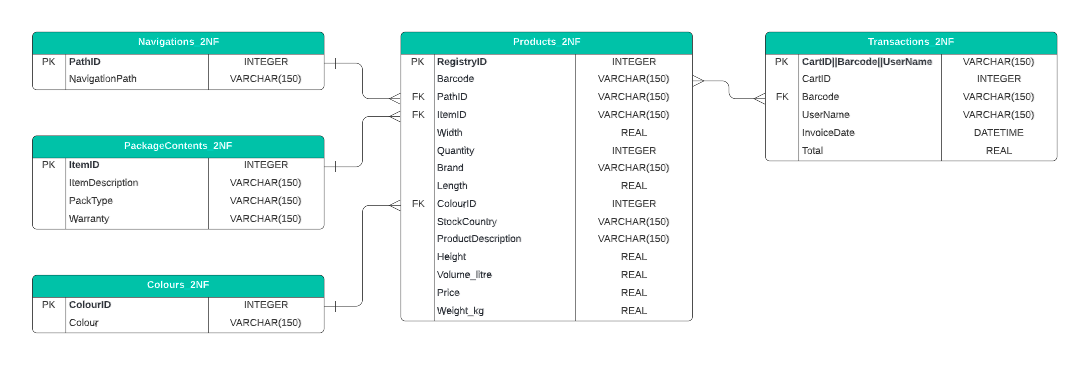

In [9]:
# Detecting the errors

%%read_sql

select count(distinct barcode) from Transactions_1NF where barcode not in (select barcode from products_1NF)

Query started at 09:15:19 PM Egypt Standard Time; Query executed in 0.00 m

,count(distinct barcode)
0,2


In [10]:
# Removing the errors

%%read_sql

delete from Transactions_1NF
WHERE barcode not in (SELECT barcode FROM products_1NF)

Query started at 09:15:19 PM Egypt Standard Time; Query executed in 0.00 m

In [11]:
# Checking if the errors were removed

%%read_sql

select count(distinct barcode) from Transactions_1NF where barcode not in (select barcode from products_1NF)

Query started at 09:15:20 PM Egypt Standard Time; Query executed in 0.00 m

,count(distinct barcode)
0,0


In [12]:
# Checking for anomalies in the tables

%%read_sql 

SELECT DISTINCT 
    ItemDescription,
    PackType,
    Warranty 
FROM
    Products
WHERE ItemDescription = '';

Query started at 09:17:07 PM Egypt Standard Time; Query executed in 0.00 m

,ItemDescription,PackType,Warranty
0,,,Limited (6 months)
1,,,Non-Returnable
2,,,Limited (12 months)
3,,,Limited (120 months)
4,,,Limited (180 months)
5,,,Limited (18 months)
6,,,Supplier (12 months)
7,,Single,Limited (6 months)
8,,,Limited (24 months)
9,,,


In [13]:
# Creating tables required for the 2NF

%%read_sql

DROP TABLE IF EXISTS "Products_2NF";
DROP TABLE IF EXISTS "Transactions_2NF";
DROP TABLE IF EXISTS "Navigation_2NF";
DROP TABLE IF EXISTS "PackageContents_2NF";
DROP TABLE IF EXISTS "Colours_2NF";

CREATE TABLE Products_2NF(
    "RegistryID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Brand" VARCHAR(150),
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "StockCountry" VARCHAR(150),
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    "PathID" INTEGER,
    "ItemID" INTEGER,
    "ColourID" INTEGER,
    PRIMARY KEY(RegistryID AUTOINCREMENT),
    CONSTRAINT fk_nav FOREIGN KEY('PathID') REFERENCES Navigation_2NF ('PathID'),
    CONSTRAINT fk_pack FOREIGN KEY('ItemID') REFERENCES PackageContents_2NF ('ItemID'),
    CONSTRAINT fk_col FOREIGN KEY('ColourID') REFERENCES Colours_2NF ('ColourID') 
);

CREATE TABLE "Transactions_2NF" (
    "CartID||Barcode||UserName" VARCHAR(150) NOT NULL,
    "CartID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "UserName" VARCHAR(150) NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    PRIMARY KEY("CartID||Barcode||UserName")
    CONSTRAINT fk_trans FOREIGN KEY('Barcode') REFERENCES Products_2NF ('Barcode')
);


CREATE TABLE "Navigation_2NF"(
    "PathID" INTEGER NOT NULL,
    "NavigationPath" VARCHAR(150),
    PRIMARY KEY("PathID" AUTOINCREMENT)
);

CREATE TABLE "Colours_2NF"(
    "ColourID" INTEGER NOT NULL,
    "Colour" VARCHAR(150),
    PRIMARY KEY("ColourID" AUTOINCREMENT)
);

CREATE TABLE "PackageContents_2NF"(
    "ItemID" INTEGER NOT NULL,
    "ItemDescription" VARCHAR(150),
    "PackType" VARCHAR(150),
    "Warranty" VARCHAR(150),
    PRIMARY KEY("ItemID" AUTOINCREMENT)
);

Query started at 09:17:13 PM Egypt Standard Time; Query executed in 0.00 m

In [14]:
# Populating the 2NF tables with data

%%read_sql

DELETE FROM "Products_2NF";
DELETE FROM "Transactions_2NF";
DELETE FROM "Navigation_2NF";
DELETE FROM "PackageContents_2NF";
DELETE FROM "Colours_2NF";


INSERT INTO "Navigation_2NF"("NavigationPath")
SELECT DISTINCT 
    NavigationPath 
FROM
    Products_1NF;
    
INSERT INTO "PackageContents_2NF"("ItemDescription","PackType","Warranty")
SELECT DISTINCT 
    ItemDescription,
    PackType,
    Warranty 
FROM
    Products_1NF
WHERE ItemDescription <> ''
        ;
    
INSERT INTO "Colours_2NF"("Colour")
SELECT DISTINCT 
    Colour
FROM
    Products_1NF
WHERE Colour <> ''
        ;

Query started at 09:17:19 PM Egypt Standard Time; Query executed in 0.01 m

In [15]:
# Inserting data into the Products_2NF table from the Products_1NF table

%%read_sql 

INSERT INTO "Products_2NF" ("PathID","ItemID","ColourID","Barcode","ProductDescription","Brand","Price",
                            "Quantity","StockCountry","Weight_kg","Volume_litre",
                            "Length","Width","Height")
SELECT
    PathID,
    ItemID,
    ColourID,
    Products_1NF.Barcode,
    ProductDescription,
    Brand,
    Price,
    Quantity,
    StockCountry,
    Weight_kg, 
    Volume_litre, 
    Length,
    Width,
    Height 
FROM 
    Products_1NF
LEFT JOIN Navigation_2NF ON Products_1NF.NavigationPath = Navigation_2NF.NavigationPath 
LEFT JOIN PackageContents_2NF ON Products_1NF.ItemDescription = PackageContents_2NF.ItemDescription
LEFT JOIN Colours_2NF ON Products_1NF.Colour = Colours_2NF.Colour

Query started at 09:17:22 PM Egypt Standard Time; Query executed in 0.00 m

In [16]:
# Inserting data into the Transactions_2NF table from the Transactions_1NF table

%%read_sql 

INSERT INTO "Transactions_2NF"("CartID||Barcode||UserName","CartID","Barcode","UserName","InvoiceDate","Total")
SELECT DISTINCT 
    CartID||Transactions_1NF.Barcode||UserName
    ,CartID
    ,Transactions_1NF.Barcode
    ,UserName
    ,InvoiceDate
    ,Total
FROM
    Transactions_1NF
LEFT JOIN Products_2NF ON Transactions_1NF.Barcode = Products_2NF.Barcode ;

Query started at 09:17:55 PM Egypt Standard Time; Query executed in 0.01 m

### Convert the database tables into their 3rd Normal Form (3NF)

Below is an Entity Relationship Diagram (ERD) of the Bhejane Online Trading Store database that conforms to the 3rd Normal Form:

In [17]:
# Creating tables required for the 3NF

%%read_sql

DROP TABLE IF EXISTS "Transactions_3NF";
DROP TABLE IF EXISTS "Carts_3NF";
DROP TABLE IF EXISTS "Products_3NF";
DROP TABLE IF EXISTS "Users_3NF";
DROP TABLE IF EXISTS "Navigation_3NF";
DROP TABLE IF EXISTS "PackageContents_3NF";
DROP TABLE IF EXISTS "Colours_3NF";
DROP TABLE IF EXISTS "Brands_3NF";
DROP TABLE IF EXISTS "Locations_3NF";

CREATE TABLE "Products_3NF" (
    "RegistryID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    "PathID" INTEGER,
    "ItemID" INTEGER,
    "ColourID" INTEGER,
    "BrandID" INTEGER,
    "LocationID" INTEGER,
    PRIMARY KEY("RegistryID" AUTOINCREMENT),
    FOREIGN KEY("PathID") REFERENCES "Navigation_3NF" ("PathID"),
    FOREIGN KEY("ItemID") REFERENCES "PackageContents_3NF" ("ItemID"),
    FOREIGN KEY("ColourID") REFERENCES "Colours_3NF" ("ColourID") ,
    FOREIGN KEY ("BrandID") REFERENCES "Brands_3NF" ("BrandID"),
    FOREIGN KEY ("LocationID") REFERENCES "Locations_3NF" ("LocationID")
);


CREATE TABLE "Carts_3NF" (
    "CartID" INTEGER NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    PRIMARY KEY ("CartID")
);


CREATE TABLE "Users_3NF"(
    "UserID" INTEGER NOT NULL,
    UserName VARCHAR(50) NOT NULL,
    PRIMARY KEY("UserID" AUTOINCREMENT)
);

Query started at 09:18:02 PM Egypt Standard Time; Query executed in 0.00 m

In [18]:
# Creating tables required for the 3NF

%%read_sql

CREATE TABLE "Transactions_3NF"(
    "CartID||Barcode||UserName"  VARCHAR(150),
    "CartID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "UserID"  INTEGER NOT NULL,
    PRIMARY KEY ("CartID||Barcode||UserName"),
    FOREIGN KEY ("Barcode") REFERENCES "Products_3NF"("UserID"),
    FOREIGN KEY ("CartID") REFERENCES "Carts_3NF" ("CartID"),
    FOREIGN KEY ("UserID") REFERENCES "Users_3NF"("UserID")
);
    
CREATE TABLE "Navigation_3NF"(
    "PathID" INTEGER NOT NULL, 
    "NavigationPath" VARCHAR(150),
    PRIMARY KEY("PathID" AUTOINCREMENT)
);


CREATE TABLE "PackageContents_3NF"(
    "ItemID" INTEGER NOT NULL,
    "ItemDescription" VARCHAR(150),
    "PackType" VARCHAR(150),
    "Warranty" VARCHAR(150),
    PRIMARY KEY("ItemID" AUTOINCREMENT)
);

CREATE TABLE "Colours_3NF"(
    "ColourID" INTEGER NOT NULL,
    "Colour" VARCHAR(150),
    PRIMARY KEY("ColourID" AUTOINCREMENT)
);

CREATE TABLE "Brands_3NF"(
    "BrandID" INTEGER NOT NULL,
    "Brand" VARCHAR(150),
    PRIMARY KEY ("BrandID" AUTOINCREMENT) 
);
    
CREATE TABLE "Locations_3NF"(
    "LocationID" INTEGER NOT NULL,
    "StockCountry" VARCHAR(150),
    PRIMARY KEY ("LocationID" AUTOINCREMENT)
);

Query started at 09:18:08 PM Egypt Standard Time; Query executed in 0.00 m

In [19]:
# Populating the 3NF tables with data

%%read_sql

DELETE FROM "Products_3NF";
DELETE FROM "Transactions_3NF";
DELETE FROM "Carts_3NF";
DELETE FROM "Users_3NF";
DELETE FROM "Navigation_3NF";
DELETE FROM "PackageContents_3NF";
DELETE FROM "Colours_3NF";
DELETE FROM "Brands_3NF";
DELETE FROM "Locations_3NF";

INSERT INTO "Users_3NF" ("UserName")
SELECT DISTINCT UserName FROM Transactions_2NF;

Query started at 09:18:15 PM Egypt Standard Time; Query executed in 0.00 m

In [20]:
# Inserting data into the 3NF tables from the 2NF tables and Removing duplicate values

%%read_sql

INSERT INTO "Carts_3NF"("CartID","InvoiceDate","Total")
SELECT DISTINCT 
    CartID,
    InvoiceDate,
    Total
FROM Transactions_2NF;

Query started at 09:18:21 PM Egypt Standard Time; Query executed in 0.00 m

In [21]:
# Inserting data into the 3NF tables from the 2NF tables and Removing duplicate values

%%read_sql

INSERT INTO "Locations_3NF" ("StockCountry")
SELECT DISTINCT 
    StockCountry 
FROM Products_2NF
WHERE Stockcountry <> '';

INSERT INTO "Brands_3NF" ("Brand")
SELECT DISTINCT 
    Brand 
FROM Products_2NF
WHERE Brand <> '';

INSERT INTO "Colours_3NF" ("Colour")
SELECT DISTINCT 
    Colour 
FROM Colours_2NF;

INSERT INTO "PackageContents_3NF" ("ItemDescription","PackType","Warranty")
SELECT DISTINCT 
    ItemDescription,
    PackType,
    Warranty 
FROM PackageContents_2NF;

INSERT INTO "Navigation_3NF" ("NavigationPath")
SELECT DISTINCT 
    NavigationPath 
FROM Navigation_2NF;

Query started at 09:18:26 PM Egypt Standard Time; Query executed in 0.00 m

In [22]:
# Inserting data into the Products_3NF table from the Products_2NF table

%%read_sql

INSERT INTO "Products_3NF" ("PathID","ItemID","ColourID","BrandID","LocationID",
                            "Barcode","ProductDescription","Price",
                            "Quantity","Weight_kg","Volume_litre",
                            "Length","Width","Height")
SELECT
    Navigation_3NF.PathID,
    PackageContents_3NF.ItemID,
    Colours_3NF.ColourID,
    Brands_3NF.BrandID,
    Locations_3NF.LocationID,
    Products_2NF.Barcode,
    ProductDescription,
    Price,
    Quantity,
    Weight_kg, 
    Volume_litre, 
    Length,
    Width,
    Height 
FROM 
    Products_2NF
LEFT JOIN Navigation_3NF ON Navigation_3NF.PathID=Products_2NF.PathID 
LEFT JOIN PackageContents_3NF ON PackageContents_3NF.ItemID=Products_2NF.ItemID
LEFT JOIN Colours_3NF ON Colours_3NF.ColourID=Products_2NF.ColourID
LEFT JOIN Brands_3NF ON Brands_3NF.Brand=Products_2NF.Brand
LEFT JOIN Locations_3NF ON  Locations_3NF.StockCountry=Products_2NF.StockCountry

Query started at 09:18:40 PM Egypt Standard Time; Query executed in 0.01 m

In [23]:
# Inserting data into the Transactions_3NF table from the Transactions_2NF table

%%read_sql

INSERT INTO "Transactions_3NF"("CartID||Barcode||UserName","CartID","Barcode","UserID")
SELECT DISTINCT 
    transactions_2nf.CartID||transactions_2nf.Barcode||Users_3NF.UserName,
    transactions_2nf.Barcode,
    transactions_2nf.CartID,
    Users_3NF.UserID
FROM
    Transactions_2NF
LEFT JOIN users_3NF ON Users_3NF.UserName=Transactions_2NF.UserName 
LEFT JOIN Carts_3NF ON Transactions_2NF.invoicedate = Carts_3nf.invoicedate
LEFT JOIN Products_3NF ON Transactions_2NF.Barcode = Products_3nf.Barcode

Query started at 09:18:44 PM Egypt Standard Time; Query executed in 0.00 m

In [24]:
# Checking how many entries/rows are in each table in the database

%%read_sql 
 
select '3. Products_3NF' as table_name, count(*) from Products_3NF
UNION
select '3. Transactions_3NF' as table_name, count(*) from Transactions_3NF
UNION
select '3. Users_3NF' as table_name, count(*) from Users_3NF
UNION
select '3. Navigation_3NF' as table_name, count(*) from Navigation_3NF
UNION
select '3. PackageContents_3NF' as table_name, count(*) from PackageContents_3NF
UNION
select '3. Colours_3NF' as table_name, count(*) from Colours_3NF
UNION
select '3. Brands_3NF' as table_name, count(*) from Brands_3NF
UNION
select '3. Locations_3NF' as table_name, count(*) from Locations_3NF
UNION
select '3. Carts_3NF' as table_name, count(*) from Carts_3NF

Query started at 09:18:49 PM Egypt Standard Time; Query executed in 0.00 m

,table_name,count(*)
0,3. Brands_3NF,232
1,3. Carts_3NF,190
2,3. Colours_3NF,17
3,3. Locations_3NF,2
4,3. Navigation_3NF,396
5,3. PackageContents_3NF,600
6,3. Products_3NF,1214
7,3. Transactions_3NF,275
8,3. Users_3NF,158


## Database Analysis

### Question 1

How many unique products does the company have?

In [25]:
%%read_sql

SELECT COUNT(DISTINCT Barcode) AS 'Products'
FROM Products_3NF;

Query started at 09:18:55 PM Egypt Standard Time; Query executed in 0.00 m

,Products
0,608


**Solution:** The company has 608 unique products.

### Question 2

How many users bought from Bhejane in April 2020?

In [26]:
%%read_sql

SELECT Count(DISTINCT username) AS "Users"
FROM transactions
WHERE Invoicedate BETWEEN '2020-04-01' AND '2020-05-01'

Query started at 09:18:59 PM Egypt Standard Time; Query executed in 0.00 m

,Users
0,31


**Solution:** 31 users bought from the company.

### Question 3

How many users bought 3 or more items that cost more than R1000?

In [27]:
%%read_sql

SELECT Products_2NF.ItemID,Products_2NF.Price,Products_2NF.Barcode, Transactions_3NF.*, Users_3NF.*
FROM ((Products_2NF
LEFT JOIN Transactions_3NF ON Products_2NF.Barcode=Transactions_3NF.Barcode)
LEFT JOIN Users_3NF ON Transactions_3NF.UserID=Users_3NF.UserID)
WHERE Price > 1000
--LIMIT 3;

Query started at 09:19:02 PM Egypt Standard Time; Query executed in 0.00 m

,ItemID,Price,Barcode,CartID||Barcode||UserName,CartID,Barcode,UserID,UserID,UserName
0,NaN,5199.0,193808791192,None,None,None,None,None,None
1,33.0,1159.0,711719870258,None,None,None,None,None,None
2,39.0,1999.0,741311301174,None,None,None,None,None,None
3,46.0,1399.0,815592024309,None,None,None,None,None,None
4,47.0,1399.0,815592024309,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
63,NaN,2599.0,HTBH54I571A,None,None,None,None,None,None
64,426.0,1399.0,ME1000VU,None,None,None,None,None,None
65,427.0,1399.0,ME1000VU,None,None,None,None,None,None
66,428.0,1399.0,ME1000VU,None,None,None,None,None,None


**Solution:** 68 users bought 3 or more items that cost more than R1000.

### Question 4

Which user made the largest purchase on a single transaction?

In [28]:
%%read_sql

SELECT Users_3NF.UserName,MAX(Total)
FROM Carts_3NF
LEFT JOIN Transactions_3NF
USING(CartID)
LEFT JOIN Users_3NF
USING(UserID)

Query started at 09:19:06 PM Egypt Standard Time; Query executed in 0.00 m

,UserName,MAX(Total)
0,None,10999.0


**Solution:** The user has no name but the largest purchase was for R10 999.

### Question 5

How many components does the product: "5m Colour Changing RGB LED Strip Light" (MPTAL57588104) come with?

In [29]:
%%read_sql

SELECT COUNT(DISTINCT Itemdescription) AS "Components"
FROM PackageContents_3NF
LEFT JOIN Products_3NF
USING(ItemID) 
WHERE productdescription= "5m Colour Changing RGB LED Strip Light" 

Query started at 09:19:10 PM Egypt Standard Time; Query executed in 0.00 m

,Components
0,4


**Solution:** The product has 4 components.

### Question 6

How many brands are available at Bhejane?

In [30]:
%%read_sql

SELECT COUNT(DISTINCT Brand) AS "Bhejane Brands"
FROM Brands_3NF

Query started at 09:19:15 PM Egypt Standard Time; Query executed in 0.00 m

,Bhejane Brands
0,232


**Solution:** There are 232 brands.

### Question 7

What is the price of the "Verimark - Floorwiz 2in1 Mop"?

In [31]:
%%read_sql

SELECT productdescription,price
FROM products_3NF
WHERE Productdescription='Verimark - Floorwiz 2in1 Mop'
LIMIT 2;

Query started at 09:19:19 PM Egypt Standard Time; Query executed in 0.00 m

,ProductDescription,Price
0,Verimark - Floorwiz 2in1 Mop,179.0
1,Verimark - Floorwiz 2in1 Mop,179.0


**Solution:** The price is R179.

### Question 8

Calculate the package volume of the "Russell Hobbs - Slow Cooker" using the given dimensions

In [32]:
%%read_sql

WITH CTE AS(
SELECT Length*Width*Height as Volume,productdescription
FROM Products_3NF)
SELECT *
FROM CTE
WHERE productdescription='Russell Hobbs - Slow Cooker'
LIMIT 2;

Query started at 09:19:25 PM Egypt Standard Time; Query executed in 0.00 m

,Volume,productdescription
0,26928.0,Russell Hobbs - Slow Cooker
1,26928.0,Russell Hobbs - Slow Cooker


**Solution:** The package volume is 26 928.

### Question 9

Which user made the most transactions in the Year 2020?

In [33]:
%%read_sql

SELECT Transactions_3NF.*, Users_3NF.*, Carts_3NF.*
FROM Transactions_3NF
INNER JOIN Users_3NF ON Transactions_3NF.UserID=Users_3NF.UserID
INNER JOIN Carts_3NF ON Transactions_3NF.CartID=Carts_3NF.CartID
LIMIT 4;

Query started at 09:19:29 PM Egypt Standard Time; Query executed in 0.00 m

,CartID||Barcode||UserName,CartID,Barcode,UserID,UserID,UserName,CartID,InvoiceDate,Total


**Solution:** NA

### Question 10

What is the total number of users that shop at Bhejane?

In [34]:
%%read_sql

SELECT COUNT(DISTINCT UserID)
FROM Users_3NF

Query started at 09:19:34 PM Egypt Standard Time; Query executed in 0.00 m

,COUNT(DISTINCT UserID)
0,158


**Solution:** There are 158 users in total.

### Question 11

What is the record count for the Colours_3NF Table?

In [35]:
%%read_sql

SELECT COUNT(*) AS "Records"
FROM Colours_3NF

Query started at 09:19:38 PM Egypt Standard Time; Query executed in 0.00 m

,Records
0,17


**Solution:** The record count is 17.

### Question 12

What would the total price be if I had the following items in my cart?

In [36]:
%%read_sql

SELECT SUM(DISTINCT Price) AS "Total Price"
FROM Products_3NF
WHERE Barcode in('MPTAL57588104','5000394203921','6932391917652')
limit 10

Query started at 09:19:42 PM Egypt Standard Time; Query executed in 0.00 m

,Total Price
0,734.0


**Solution:** The total price will be R734.

### Question 13

What is the barcode of the most sold product?

In [37]:
%%read_sql

SELECT Barcode, Price, COUNT(Barcode) AS "Most Sold Product"
FROM Products_3NF
ORDER BY Barcode DESC
LIMIT 4;

Query started at 09:19:46 PM Egypt Standard Time; Query executed in 0.00 m

,Barcode,Price,Most Sold Product
0,300507946,399.0,1214


**Solution:** The barcode is 300507946.

### Question 14

What are the products of Cornelis’ cart on the 2020-06-28 0:00:00?

In [38]:
%%read_sql

SELECT DISTINCT Users_3NF.UserName,Products_3NF.Productdescription, Carts_3NF.InvoiceDate
FROM Products_3NF
LEFT JOIN  Transactions_3NF
USING(Barcode)
LEFT JOIN Carts_3NF
USING(CartID)
LEFT JOIN Users_3NF
USING(UserID)
WHERE InvoiceDate = '%2020-06-28 0:00:00%' and Username = 'Cornelis'

Query started at 09:19:50 PM Egypt Standard Time; Query executed in 0.00 m

,UserName,ProductDescription,InvoiceDate


**Solution:** NA

### Question 15

Which users bought locally produced, black-coloured products on odd-numbered months of the year, and what was the total cost (rounded to the nearest integer) of the carts containing these products?

In [39]:
%%read_sql

SELECT Products_1NF.Stockcountry,Transactions_1NF.Username,Products_1NF.Colour,Transactions_1NF.Invoicedate,Transactions_1NF.Total
FROM Products_1NF
LEFT JOIN Transactions_1NF
USING(Barcode)
WHERE Stockcountry='South Africa' and Colour='Black' and Invoicedate like '%05%'

Query started at 09:19:55 PM Egypt Standard Time; Query executed in 0.00 m

,StockCountry,UserName,Colour,InvoiceDate,Total
0,South Africa,Carel,Black,2020-05-04 0:00:00,799.0
1,South Africa,Carel,Black,2020-05-04 0:00:00,799.0
2,South Africa,Carel,Black,2020-05-04 0:00:00,799.0
3,South Africa,Carel,Black,2020-05-04 0:00:00,799.0
4,South Africa,Lacin,Black,2020-05-18 0:00:00,798.0
5,South Africa,Lacin,Black,2020-05-18 0:00:00,798.0


In [40]:
%%read_sql

SELECT Locations_3NF.Stockcountry,Users_3NF.Username,Colours_3NF.Colour,Carts_3NF.Invoicedate,Carts_3NF.Total
FROM Locations_3NF
LEFT JOIN Products_3NF
USING(LocationID)
LEFT JOIN Transactions_3NF
USING(Barcode)
LEFT JOIN Users_3NF
USING(UserID)
LEFT JOIN Carts_3NF
USING(CartID)
LEFT JOIN Colours_3NF
USING(colourID)
WHERE Stockcountry='South Africa' and Colour='Black'

Query started at 09:20:01 PM Egypt Standard Time; Query executed in 0.00 m

,StockCountry,UserName,Colour,InvoiceDate,Total
0,South Africa,None,Black,None,None
1,South Africa,None,Black,None,None
2,South Africa,None,Black,None,None
3,South Africa,None,Black,None,None
4,South Africa,None,Black,None,None
...,...,...,...,...,...
93,South Africa,None,Black,None,None
94,South Africa,None,Black,None,None
95,South Africa,None,Black,None,None
96,South Africa,None,Black,None,None


**Solution:** Caril and Lacin.